In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#1
import pandas as pd
import numpy as np

In [3]:
path="/content/drive/MyDrive/Colab Notebooks/23.csv"
df=pd.read_csv(path)
print(df)

          ID  ...   Medal
0         72  ...    Gold
1        507  ...  Bronze
2        507  ...    Gold
3        507  ...  Silver
4        953  ...  Bronze
...      ...  ...     ...
1036  135018  ...    Gold
1037  135018  ...    Gold
1038  135109  ...    Gold
1039  135109  ...  Bronze
1040  135245  ...  Silver

[1041 rows x 15 columns]


In [4]:
df.dtypes

ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object

In [5]:
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       5
Height    6
Weight    5
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [6]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Height'].fillna(df['Height'].mean(),inplace=True)
df['Weight'].fillna(df['Weight'].mean(),inplace=True)
df.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [7]:
#2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import io
import seaborn as sns

Text(0.5, 1.0, 'Bar graph')

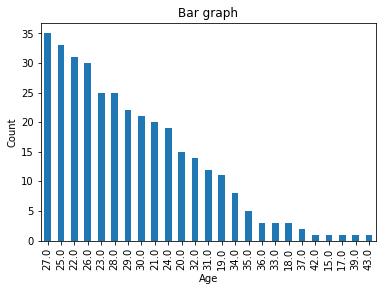

In [8]:
silver_df = df[df['Medal'] == "Silver"]
silver_df.Age.value_counts().plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Bar graph')

In [9]:
#3
df['BMI']= (df['Weight']/df['Height']*df['Height'])
df

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,BMI
0,72,Aleksey Aleksandrovich Abalmasov,M,28.0,180.0,83.0,Belarus,BLR,2008 Summer,2008,Summer,Beijing,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,83.0
1,507,Attila brahm,M,21.0,192.0,88.0,Hungary,HUN,1988 Summer,1988,Summer,Seoul,Canoeing,"Canoeing Men's Kayak Doubles, 500 metres",Bronze,88.0
2,507,Attila brahm,M,21.0,192.0,88.0,Hungary,HUN,1988 Summer,1988,Summer,Seoul,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Gold,88.0
3,507,Attila brahm,M,25.0,192.0,88.0,Hungary,HUN,1992 Summer,1992,Summer,Barcelona,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",Silver,88.0
4,953,Franck Adisson,M,23.0,180.0,70.0,France-1,FRA,1992 Summer,1992,Summer,Barcelona,Canoeing,"Canoeing Men's Canadian Doubles, Slalom",Bronze,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,135018,Annemarie Zimmermann,F,24.0,170.0,65.0,Germany,GER,1964 Summer,1964,Summer,Tokyo,Canoeing,"Canoeing Women's Kayak Doubles, 500 metres",Gold,65.0
1037,135018,Annemarie Zimmermann,F,28.0,170.0,65.0,West Germany,FRG,1968 Summer,1968,Summer,Mexico City,Canoeing,"Canoeing Women's Kayak Doubles, 500 metres",Gold,65.0
1038,135109,Carola Zirzow (-Drechsler),F,21.0,178.0,78.0,East Germany,GDR,1976 Summer,1976,Summer,Montreal,Canoeing,"Canoeing Women's Kayak Singles, 500 metres",Gold,78.0
1039,135109,Carola Zirzow (-Drechsler),F,21.0,178.0,78.0,East Germany,GDR,1976 Summer,1976,Summer,Montreal,Canoeing,"Canoeing Women's Kayak Doubles, 500 metres",Bronze,78.0


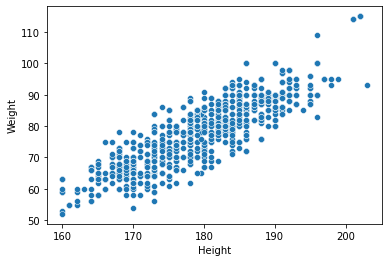

In [10]:
#4
sns.scatterplot(x="Height", y="Weight", data=df)

In [11]:
col_height_weight =[
'Height',
'Weight']
df[col_height_weight].corr()

,Height,Weight
Height,1.000000,0.860369
Weight,0.860369,1.000000


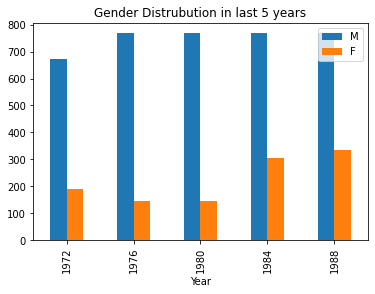

In [12]:
#5
df['Sex'].astype(str)
years = [1972, 1976, 1980, 1984, 1988]
m=[]
f=[]
for i in years:
    year_grouped = df.loc[df.Year == i]
    male_grouped = year_grouped.loc[year_grouped.Sex == 'M']
    female_grouped = year_grouped.loc[year_grouped.Sex == 'F']
    m.append(male_grouped.size)
    f.append(female_grouped.size)

gender_grouped = pd.DataFrame([[years[x], m[x], f[x]] for x in range(5)],
                  columns=['Year', 'M', 'F'])

gender_grouped.plot(x='Year',
        kind='bar',
        stacked=False,
        title='Gender Distrubution in last 5 years')

In [46]:
#Task-1
top_year = df.Team.value_counts()
top_year

Germany           28
Hungary           28
Romania           16
Soviet Union      16
Slovakia          12
East Germany      12
Czech Republic     8
Australia          8
Norway             8
Spain              4
Russia             4
Sweden             4
Poland             4
Bulgaria           4
New Zealand        4
Belarus            4
France             4
Name: Team, dtype: int64

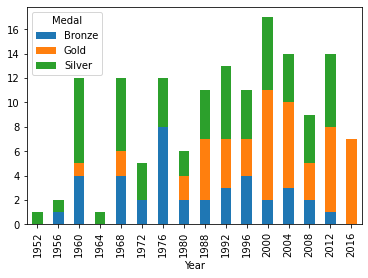

In [49]:
max_year = df.Team.value_counts()
df2 = df.query('Team=="Hungary"')
df2.groupby(['Year','Medal']).size().unstack().plot(kind='bar',stacked="True")

In [131]:
#Task 2
k=pd.DataFrame({'Name':df['Name'],'Medal':df['Medal'],'Year':df['Year']})
q=pd.DataFrame({'Name':df['Name'].unique()});
q['Medal Frequency']=0
q['Years participated']=0
count1 =0;
for i in q['Name']:
    count =0
    max=2016
    min=1936
    for j in k['Name']:
        if (j==i):
            q['Medal Frequency'][count1]+=1;
            if (k['Year'][count]>=max):
                max=k['Year'][count]
            if (k['Year'][count]<=min):
                min=k['Year'][count]
        count+=1;
    q['Years participated'][count1]=(max-min)+1;
    count1+=1;
q['Success Rate']= q['Medal Frequency']/q['Years participated']
success=q['Success Rate'].max();
count=0

for i in q['Success Rate']:
    if (i==success):
        print(q['Name'][count], "is the most successful athlete")
    count+=1;

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Birgit Fischer-Schmidt is the most successful athlete
